In [2]:
import os
import glob
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
dataset_path = 'Faceshape_dataset'
# The dataset folder is inside a subdirectory called 'dataset'
base_dir = os.path.join(dataset_path)
print('using dataset folder: ', base_dir)
#list the subdirectories in base_dir
subdirs = os.listdir(base_dir)
print('subdirectories in base_dir: ', subdirs)

using dataset folder:  Faceshape_dataset
subdirectories in base_dir:  ['test', 'train']


In [4]:
#prepare a list to collect file paths and labels
data = []

#iterate over the subdirectories
for split in subdirs:
    split_dir = os.path.join(base_dir, split)
    if not os.path.isdir(split_dir):
        print(f'warning: {split_dir} is not a directory, skipping.')
        continue
    #list class folders within each split directory
    class_folders = [os.path.join(split_dir, folder)
                     for folder in os.listdir(split_dir)
                     if os.path.isdir(os.path.join(split_dir, folder))]
    print(f'found class folders in "{split}":', [os.path.basename(cf) for cf in class_folders])
    
    #iterate over each class folder
    for class_folder in class_folders:
        label = os.path.basename(class_folder) #folder name as label
        #get all images filepath
        img_files = glob.glob(os.path.join(class_folder,'*.*'))
        print(f'found {len(img_files)} files in "{label}" folder under "{split}".')
        for img_path in img_files:
            data.append({'filepath': img_path, 'label': label, 'orginal_split': split})

#create a dataframe from the collected data
df = pd.DataFrame(data)
#check if df contains the label
if 'label' in df.columns and not df.empty:
    print('Total samples in the dataset: ', len(df))
    print('class distribution:')
    print(df['label'].value_counts())
else:
    raise KeyError('the label column is missing from df.')

#split dataset into train 70% test 10% validation 20%
#first split the test set 10%
train_val_df, test_df = train_test_split(
    df,
    test_size=0.10,
    stratify=df['label'],
    random_state=42)

#from the remaining 90% allocate 20% for validation
train_df, val_df = train_test_split(
    train_val_df,
    test_size=0.2222, #~20% of overall data
    stratify=train_val_df['label'],
    random_state=42)

#show the number of samples for each split
print('\ntrain samples: ', len(train_df))
print('\nvalidation samples: ', len(val_df))
print('\ntest samples: ', len(test_df))

#save the splits to csv for processing
train_df.to_csv('train_data.csv', index=False)
val_df.to_csv('val_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

found class folders in "test": ['Heart', 'Oblong', 'Oval', 'Round', 'Square']
found 200 files in "Heart" folder under "test".
found 200 files in "Oblong" folder under "test".
found 199 files in "Oval" folder under "test".
found 199 files in "Round" folder under "test".
found 200 files in "Square" folder under "test".
found class folders in "train": ['Heart', 'Oblong', 'Oval', 'Round', 'Square']
found 798 files in "Heart" folder under "train".
found 798 files in "Oblong" folder under "train".
found 797 files in "Oval" folder under "train".
found 789 files in "Round" folder under "train".
found 799 files in "Square" folder under "train".
Total samples in the dataset:  4979
class distribution:
label
Square    999
Heart     998
Oblong    998
Oval      996
Round     988
Name: count, dtype: int64

train samples:  3485

validation samples:  996

test samples:  498


In [5]:
train_df

,filepath,label,orginal_split
3461,Faceshape_dataset\train\Round\Round(161).jpg,Round,train
3700,Faceshape_dataset\train\Round\Round(377).jpg,Round,train
4368,Faceshape_dataset\train\Square\Square(268).jpg,Square,train
10,Faceshape_dataset\test\Heart\Heart(107).jpg,Heart,test
2931,Faceshape_dataset\train\Oval\Oval(401).jpg,Oval,train
...,...,...,...
4649,Faceshape_dataset\train\Square\Square(520).jpg,Square,train
4000,Faceshape_dataset\train\Round\Round(647).jpg,Round,train
3260,Faceshape_dataset\train\Oval\Oval(699).jpg,Oval,train
3481,Faceshape_dataset\train\Round\Round(18).jpg,Round,train


In [6]:
val_df

,filepath,label,orginal_split
589,Faceshape_dataset\test\Oval\Oval(90).jpg,Oval,test
1607,Faceshape_dataset\train\Heart\Heart(647).jpg,Heart,train
1452,Faceshape_dataset\train\Heart\Heart(507).jpg,Heart,train
2384,Faceshape_dataset\train\Oblong\Oblong(628).jpg,Oblong,train
854,Faceshape_dataset\test\Square\Square(149).jpg,Square,test
...,...,...,...
1090,Faceshape_dataset\train\Heart\Heart(181).jpg,Heart,train
2781,Faceshape_dataset\train\Oval\Oval(267).jpg,Oval,train
957,Faceshape_dataset\test\Square\Square(62).jpg,Square,test
3274,Faceshape_dataset\train\Oval\Oval(710).jpg,Oval,train


In [7]:
test_df

,filepath,label,orginal_split
847,Faceshape_dataset\test\Square\Square(142).jpg,Square,test
3151,Faceshape_dataset\train\Oval\Oval(60).jpg,Oval,train
3346,Faceshape_dataset\train\Oval\Oval(776).jpg,Oval,train
1353,Faceshape_dataset\train\Heart\Heart(418).jpg,Heart,train
3861,Faceshape_dataset\train\Round\Round(521).jpg,Round,train
...,...,...,...
2167,Faceshape_dataset\train\Oblong\Oblong(432).jpg,Oblong,train
4471,Faceshape_dataset\train\Square\Square(360).jpg,Square,train
1211,Faceshape_dataset\train\Heart\Heart(290).jpg,Heart,train
4543,Faceshape_dataset\train\Square\Square(425).jpg,Square,train


In [8]:
# libraries for analysis and visualization
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image

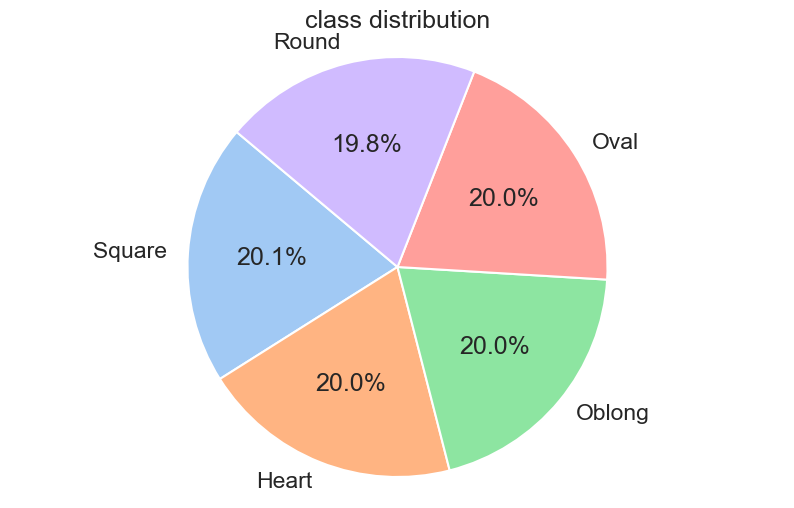

In [9]:
# plotting style
sns.set(style='whitegrid', context='talk')
plt.rcParams['figure.figsize'] = (10, 6)

#visualization overall class distribution
# create pie chart
overall_counts = df['label'].value_counts()
labels = overall_counts.index.tolist()
sizes = overall_counts.tolist()

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
ax.axis('equal') # drown pie as a circle
plt.title('class distribution')
plt.show()

In [10]:
#add column indicating split for analysis later
train_df = train_df.copy()
test_df = test_df.copy()
val_df = val_df.copy()
train_df['split'] = 'Train'
test_df['split'] = 'Test'
val_df['split'] = 'Validation'

#combined splits into one df for visualization
combined_df = pd.concat([train_df, val_df, test_df], axis=0)
print('\nsamples per split: ')
print(combined_df['split'].value_counts())


samples per split: 
split
Train         3485
Validation     996
Test           498
Name: count, dtype: int64


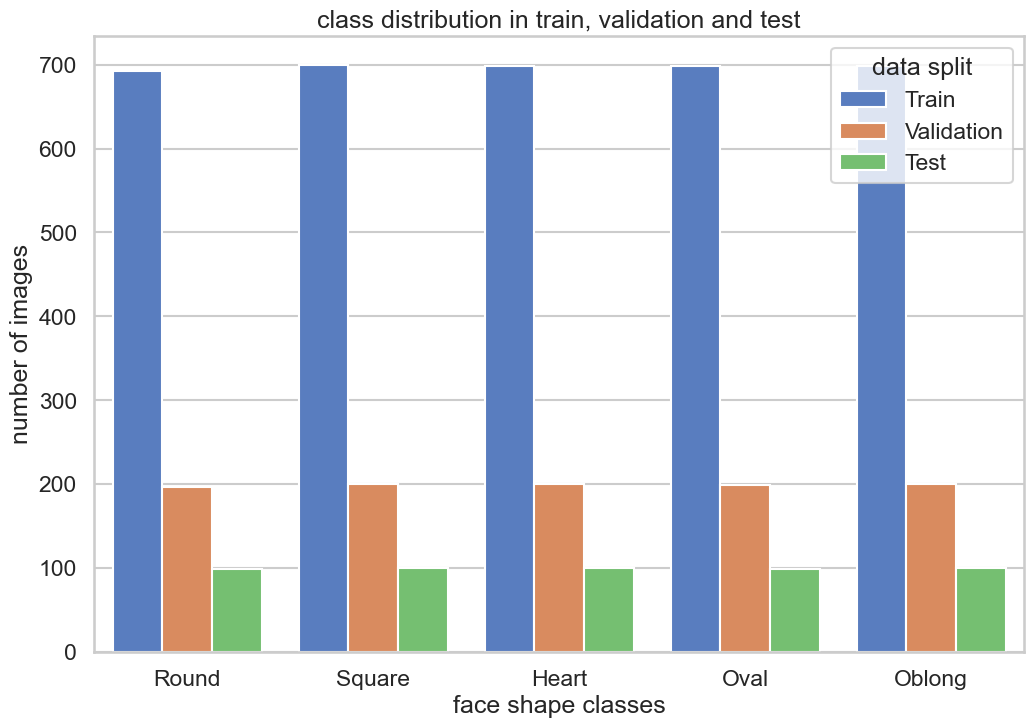

In [11]:
#visualize distribution per split
#countplot
plt.figure(figsize=(12, 8))
sns.countplot(data=combined_df, x='label', hue='split', palette='muted')
plt.title('class distribution in train, validation and test')
plt.xlabel('face shape classes')
plt.ylabel('number of images')
plt.legend(title='data split')
plt.show()

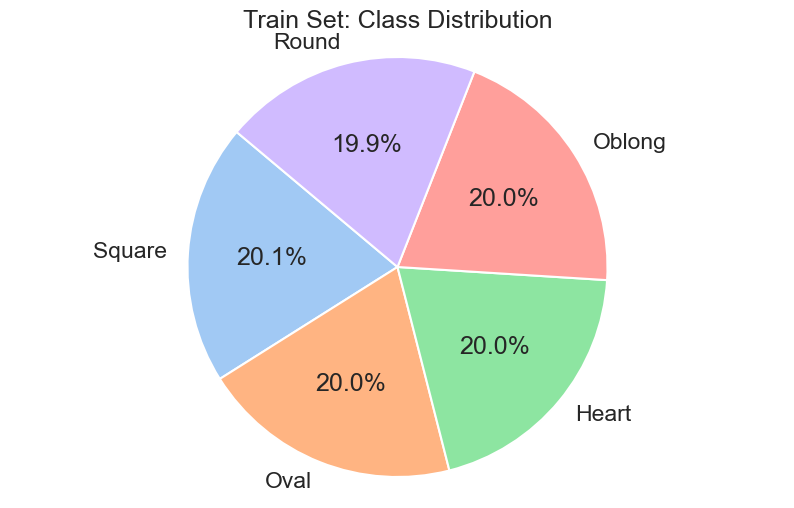

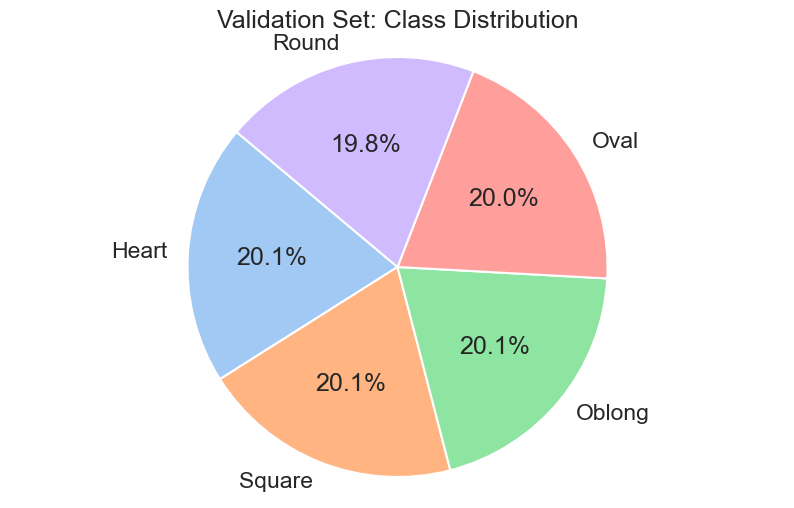

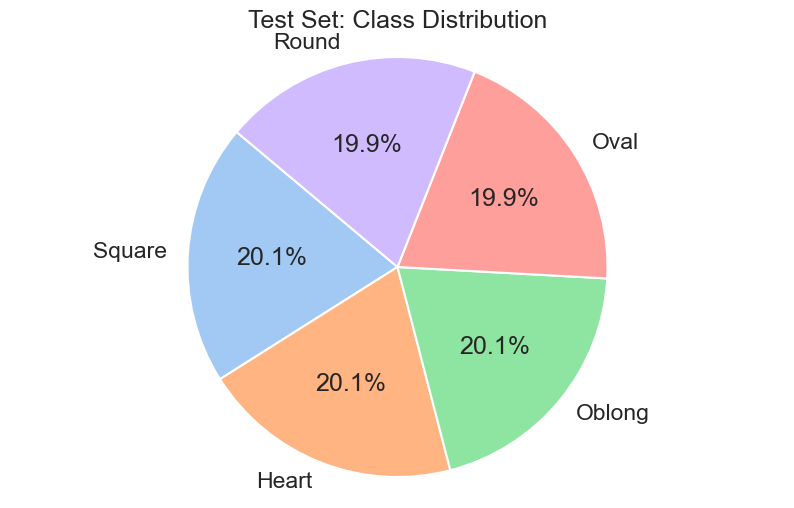

In [12]:
#chart per split for detailed view
splits = ['Train', 'Validation', 'Test']
for s in splits:
    subset = combined_df[combined_df['split'] == s]
    counts = subset['label'].value_counts()
    labels = counts.index.tolist()
    sizes = counts.tolist()
    
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    ax.axis('equal')
    plt.title(f"{s} Set: Class Distribution")
    plt.show()

In [13]:
# display sample images
def display_img(img_paths, title, cols=5):
    rows = (len(img_paths) + cols - 1) // cols
    plt.figure(figsize=(15, 3 * rows))
    for i, path in enumerate(img_paths):
        plt.subplot(rows, cols, i + 1)
        try:
            image = Image.open(path)
            plt.imshow(image)
            plt.axis('off')
        except Exception as e:
            print(f'error loading image {path}: {e}')
    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
        

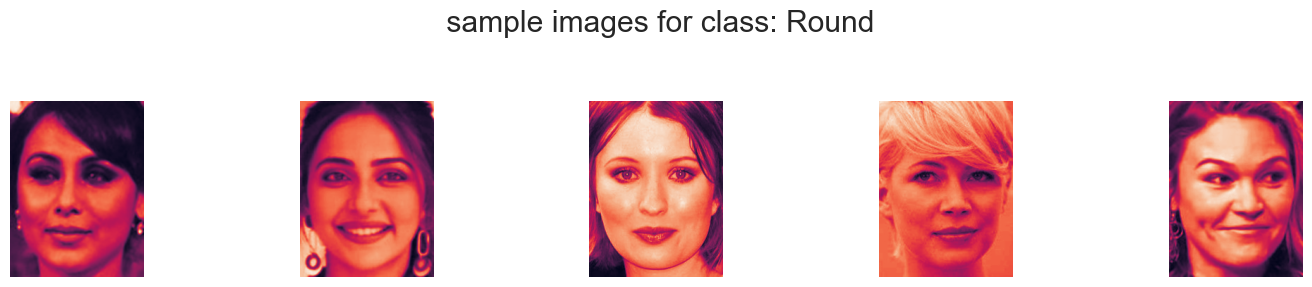

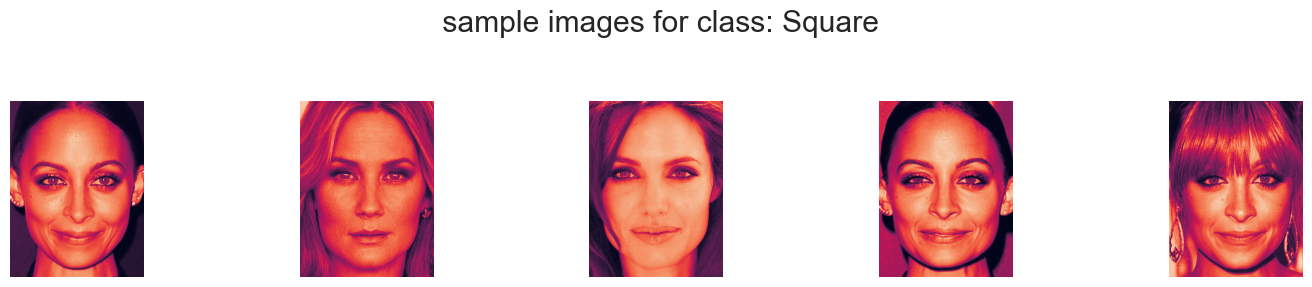

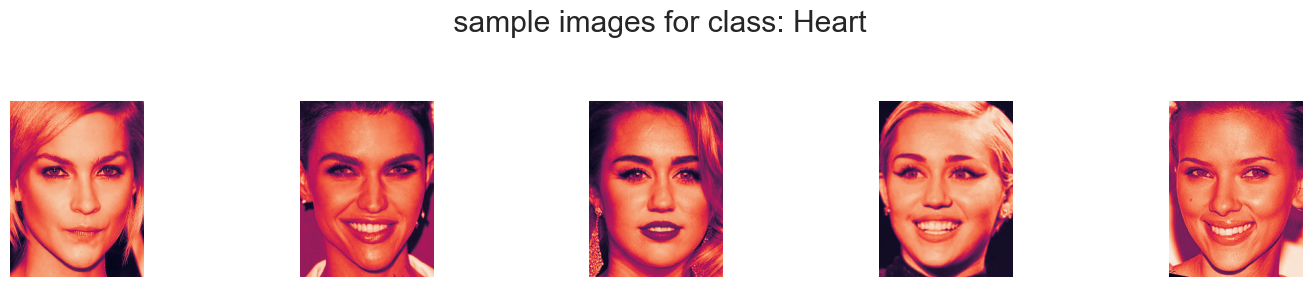

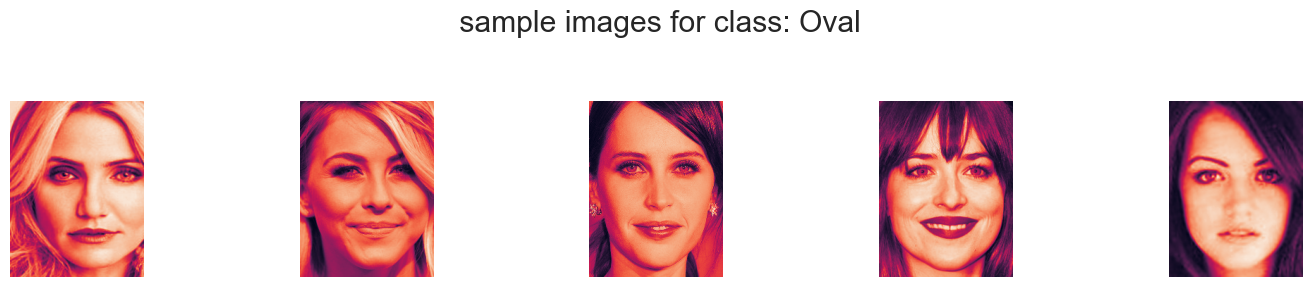

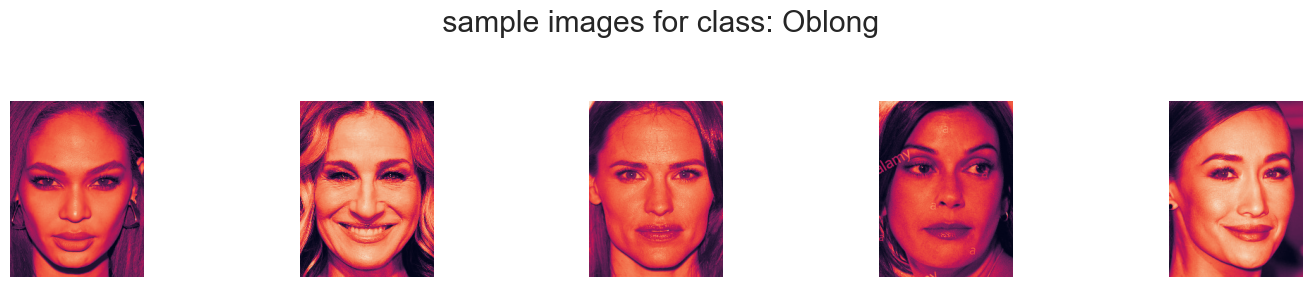

In [14]:
# from each class of train, select 5 random sample images
unique_classes = train_df['label'].unique()
for cls in unique_classes:
    sample_paths = train_df[train_df['label'] == cls]['filepath'].tolist()
    sample_paths = random.sample(sample_paths, min(5, len(sample_paths)))
    display_img(sample_paths, title=f' sample images for class: {cls}')

transformation and augmentations

In [15]:
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

In [16]:
#configuration
IMAGE_SIZE = 224
BATCH_SIZE = 64
NUM_WORKERS = 0
CSV_PATHS = {
    "train": "train_data.csv",
    "val": "val_data.csv",
    "test": "test_data.csv"
}

#augmentation
train_transforms = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.2),

    transforms.RandomAffine(
        degrees=10,
        translate=(0.05, 0.05)
    ),

    transforms.ColorJitter(
        brightness=0.15,
        contrast=0.15,
        saturation=0.1,
        hue=0.02
    ),

    transforms.RandomGrayscale(p=0.05),
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0)),
    
    transforms.RandomPerspective(distortion_scale=0.2, p=0.3),

    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

val_test_transforms = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

#custom dataset class
class FaceShapeDataset(Dataset):
    def __init__(self, csv_file, transform= None):
        self.data = pd.read_csv(csv_file)
        self.transform = transform
        
        #encode labels to int
        self.label_to_idx = {label: idx for idx, label in enumerate(sorted(self.data['label'].unique()))}
        self.idx_to_label = {idx: label for label, idx in self.label_to_idx.items()}
        self.data['label_idx'] = self.data['label'].map(self.label_to_idx)
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        image_path = self.data.iloc[idx]['filepath']
        label = self.data.iloc[idx]['label_idx']
        image = Image.open(image_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

#dataloader setup
def get_dataloaders():
    train_dataset = FaceShapeDataset(CSV_PATHS['train'], transform=train_transforms)
    val_dataset = FaceShapeDataset(CSV_PATHS['val'], transform=val_test_transforms)
    test_dataset = FaceShapeDataset(CSV_PATHS['test'], transform=val_test_transforms)
    
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

    return train_loader, val_loader, test_loader, train_dataset.idx_to_label 
        
        

In [17]:
train_loader, val_loader, test_loader, idx_to_label = get_dataloaders()
print('dataloaders ready :D')

dataloaders ready :D


In [18]:
#preview first batch
images, labels = next(iter(train_loader))
print(f'image batch shape: {images.shape}')
print(f'labels: {labels[:10]}')
print(f'decoded labels: {[idx_to_label[int(lbl)] for lbl in labels[:10]]}')

image batch shape: torch.Size([64, 3, 224, 224])
labels: tensor([4, 0, 3, 0, 3, 4, 3, 1, 3, 1])
decoded labels: ['Square', 'Heart', 'Round', 'Heart', 'Round', 'Square', 'Round', 'Oblong', 'Round', 'Oblong']


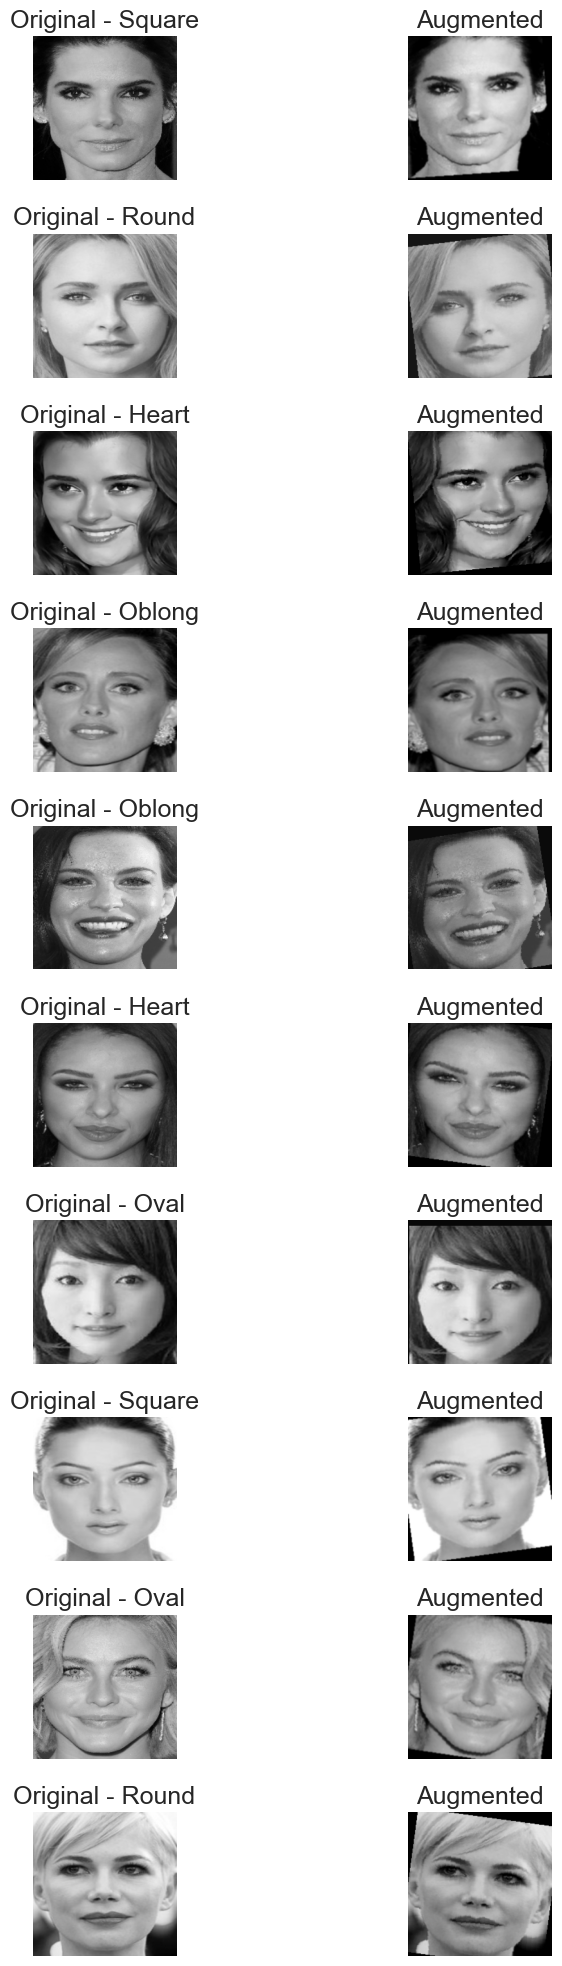

In [19]:
# Use existing config

IMAGE_SIZE = 224
CSV_PATH = "train_data.csv"

# Define transforms
original_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE))
])

# existing augmentation pipeline
augmented_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.2),
    transforms.RandomAffine(degrees=10, translate=(0.05, 0.05)),
    transforms.ColorJitter(brightness=0.15, contrast=0.15, saturation=0.1, hue=0.02),
    transforms.RandomGrayscale(p=0.05),
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0)),
])

# Load and sample data
df = pd.read_csv(CSV_PATH)
sample_df = df.sample(n=10, random_state=42).reset_index(drop=True)

# Show original vs augmented
plt.figure(figsize=(10, 20))
for i, row in sample_df.iterrows():
    img_path = row['filepath']
    label = row['label']
    img = Image.open(img_path).convert("RGB")
    
    original = original_transform(img)
    augmented = augmented_transform(img)

    # Original
    plt.subplot(10, 2, 2 * i + 1)
    plt.imshow(original)
    plt.title(f"Original - {label}")
    plt.axis("off")

    # Augmented
    plt.subplot(10, 2, 2 * i + 2)
    plt.imshow(augmented)
    plt.title("Augmented")
    plt.axis("off")

plt.tight_layout()
plt.show()

creating model

In [20]:
import torch.nn as nn
import torch.nn.functional as F

class FaceShapeCNN(nn.Module):
    def __init__(self, num_classes = 5):
        super(FaceShapeCNN, self).__init__()
        
        self.features = nn.Sequential(
            # layer 1
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),
            
            # layer 2
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            
            # layer 3
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),
            
            #layer 4
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2),
            
            #global average pooling
            nn.AdaptiveAvgPool2d((1, 1))
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )
        
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

In [21]:
from torchsummary import summary

In [22]:
#instantiate the model

model = FaceShapeCNN(num_classes=5)

#move to gpu if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

#model summ
print(model)

FaceShapeCNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=

In [23]:
summary(model, (3, 224, 224)) # adjusted input shape to 224 * 224 for resized images

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             896
       BatchNorm2d-2         [-1, 32, 224, 224]              64
              ReLU-3         [-1, 32, 224, 224]               0
            Conv2d-4         [-1, 32, 224, 224]           9,248
       BatchNorm2d-5         [-1, 32, 224, 224]              64
              ReLU-6         [-1, 32, 224, 224]               0
         MaxPool2d-7         [-1, 32, 112, 112]               0
            Conv2d-8         [-1, 64, 112, 112]          18,496
       BatchNorm2d-9         [-1, 64, 112, 112]             128
             ReLU-10         [-1, 64, 112, 112]               0
           Conv2d-11         [-1, 64, 112, 112]          36,928
      BatchNorm2d-12         [-1, 64, 112, 112]             128
             ReLU-13         [-1, 64, 112, 112]               0
        MaxPool2d-14           [-1, 64,

In [24]:
class EarlyStopping:
    def __init__(self, patience=10, verbose=False, delta=0, monitor= 'loss'):
        """
        :param patience:  epochs counter to wait before stopping
        :param verbose: print progress
        :param delta: min change to qualify as an improvement
        :param monitor: what to monitor (loss or acc) 
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = float('inf') if monitor == 'loss' else -float('inf')
        self.best_epoch = 0
        self.early_stop = False
        self.delta = delta
        self.monitor = monitor
        
    def __call__(self, val_score, epoch, model_weight, model_name_prefix):
        """
        :param val_score: the validation loss/acc in current epoch
        :param epoch: the curr epoch
        :param model_weight: weight of the model
        :param model_name_prefix: prefix for the model's name 
        """
        # if monitoring 'loss', we expect the value to decrease
        if self.monitor == 'loss':
            if val_score < self.best_score - self.delta:
                self.best_score = val_score
                self.best_epoch = epoch
                self.counter = 0
                self.save_best_weights(model_weight, model_name_prefix)
            else:
                self.counter += 1
                
        elif self.monitor == 'accuracy':
            if val_score > self.best_score + self.delta:
                self.best_score = val_score
                self.best_epoch = epoch
                self.counter = 0
                self.save_best_weights(model_weight, model_name_prefix)
            else:
                self.counter += 1
                
        if self.counter >= self.patience:
            self.early_stop = True
            if self.verbose:
                print(f'early stopping triggered after  {self.counter} epochs of no improvment.')
    
    
    def save_best_weights(self, model_weights, model_name_prefix):
        model_name = f'{model_name_prefix}_epoch_{self.best_epoch + 1}.pth'
        
        #clean up previous save models
        for file in os.listdir():
            if file.startswith(model_name_prefix) and file != model_name:
                os.remove(file)
                if self.verbose:
                    print(f'deleted old model file: {file}')
        
        torch.save(model_weights, model_name)
        if self.verbose:
            print(f'best model weights saved to {model_name}.')
                
            

In [25]:
# Training loop
best_val_loss = float('inf')  # Initialize best validation loss
best_model_weights = None

def train_and_validate(model, train_loader, valid_loader, optimizer, scheduler, criterion, model_name_prefix, epochs=25, device=None, early_stopping=None):

    # Store losses and accuracies
    train_losses = []
    valid_losses = []
    train_accuracies = []
    valid_accuracies = []
    auc_scores = []

    for epoch in range(epochs):
        print(f'Epoch {epoch + 1}/{epochs}')
        print('-' * 50)

        # Training 
        model.train()
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0

        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            # Ensure labels are Long for CrossEntropyLoss
            labels = labels.long()  # Cast labels to Long

            # Mixed precision forward pass
            with torch.amp.autocast('cuda'):

                raw_outputs = model(inputs)  # Get raw logits (not passed through softmax)
                loss = criterion(raw_outputs, labels)  # Compute loss

            # Backward pass with mixed precision
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

            running_loss += loss.item() * inputs.size(0)

            # Compute predictions (Get class with highest logit)
            with torch.no_grad():
                _, preds = torch.max(raw_outputs, 1)  # Preds are class indices
            correct_preds += torch.sum(preds == labels.data)
            total_preds += labels.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct_preds.double() / total_preds
        print(f'Training Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

        # Store training loss and accuracy
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc.item())

        # Validation phase
        model.eval()
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0
        all_preds = []
        all_labels = []

        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                # Ensure labels are Long for CrossEntropyLoss
                labels = labels.long()  # Cast labels to Long

                with torch.amp.autocast('cuda'):
                    raw_outputs = model(inputs)  # Get raw logits
                    loss = criterion(raw_outputs, labels)  # Compute loss

                running_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(raw_outputs, 1)  # Preds are class indices
                correct_preds += torch.sum(preds == labels.data)
                total_preds += labels.size(0)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        epoch_loss = running_loss / len(valid_loader.dataset)
        epoch_acc = correct_preds.double() / total_preds
        print(f'Validation Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

        # Store validation loss and accuracy
        valid_losses.append(epoch_loss)
        valid_accuracies.append(epoch_acc.item())


        # Step the scheduler based on validation loss
        scheduler.step(epoch_loss)

        # ✅ Early stopping check: save model based on validation loss
        if early_stopping is not None:
            early_stopping(epoch_loss, epoch, model.state_dict(), model_name_prefix="model")
            if early_stopping.early_stop:
                print(f"🚨 Early stopping triggered at epoch {epoch+1}.")
                break

        # ✅ Display confusion matrix & classification report every 5 epochs
        if epoch % 5 == 0 or early_stopping.early_stop:
            cm = confusion_matrix(all_labels, all_preds)
            plot_confusion_matrix(cm, classes=[i for i in range(len(set(all_labels)))])
            print("Classification Report:")
            print(classification_report(all_labels, all_preds))

    # ✅ Load the best model weights from early stopping
    print("Loading best model weights...")
    model.load_state_dict(torch.load("model_epoch_{}.pth".format(early_stopping.best_epoch + 1)))

    # ✅ Plot training metrics
    plot_metrics(train_losses, valid_losses, train_accuracies, valid_accuracies)


    return model

#helper func to plot confusion matrix
def plot_confusion_matrix(cm, classes, title= 'confusion matrix'):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=classes, yticklabels=classes, cbar=False)
    plt.title(title)
    plt.ylabel('true label')
    plt.xlabel('predicted label')
    plt.tight_layout()
    plt.show()
    
#helper func to plot loss,acc,auc scores
def plot_metrics(train_losses, valid_losses, train_accuracies, valid_accuracies):
    epochs = range(1, len(train_losses) + 1)
    
    plt.figure(figsize=(16, 8))
    
    #plot training and valid loss
    plt.subplot(1, 3, 1)
    plt.plot(epochs, train_losses, label='training loss', color='blue')
    plt.plot(epochs, valid_losses, label='validation loss', color='red')
    plt.title('loss per epoch')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    
    #plot train and valid acc
    plt.subplot(1, 3, 2)
    plt.plot(epochs, train_accuracies, label='training accuracy', color='blue')
    plt.plot(epochs, valid_accuracies, label='validation accuracy', color='red')
    plt.title('accuracy per epoch')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

def test_model(model, test_loader, criterion, device, num_classes=5):
    """
    Evaluates the model on the test set, computes loss and accuracy,
    and displays the confusion matrix and classification report.

    Args:
        model: The trained PyTorch model.
        test_loader: DataLoader for the test set.
        criterion: The loss function used during training (e.g., CrossEntropyLoss).
        device: The device to run inference on (e.g., torch.device('cuda') or torch.device('cpu')).
        num_classes: The number of classes in the classification task.
    """
    model.eval()  # Set model to evaluation mode
    running_loss = 0.0
    correct_preds = 0
    total_preds = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Use autocast for mixed precision inference
            with torch.amp.autocast('cuda'):
                raw_outputs = model(inputs)  # Get raw logits from the model
                loss = criterion(raw_outputs, labels)  # Compute loss

            running_loss += loss.item() * inputs.size(0)

            # Get class predictions (highest probability for multi-class)
            _, preds = torch.max(raw_outputs, 1)

            # Update accuracy counters
            correct_preds += torch.sum(preds == labels.data)
            total_preds += labels.size(0)

            # Accumulate for metrics
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate overall test loss and accuracy
    test_loss = running_loss / len(test_loader.dataset)
    test_accuracy = correct_preds.double() / total_preds

    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

    # Compute confusion matrix and classification report
    cm = confusion_matrix(all_labels, all_preds)
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=[str(i) for i in range(num_classes)]))

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[str(i) for i in range(num_classes)], yticklabels=[str(i) for i in range(num_classes)])
    plt.xlabel('predicted')
    plt.ylabel('true')
    plt.title('confusion matrix')
    plt.show()

In [27]:
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.cuda.amp import GradScaler

# Class weights (based on dataset size)
# Assuming classes like this: [200, 200, 199, 197, 200]
class_counts = torch.tensor([200, 200, 199, 197, 200], dtype=torch.float)
weights = 1.0 / class_counts
weights = weights / weights.sum()
loss_fn = nn.CrossEntropyLoss(weight=weights.to(device))

# Optimizer
optimizer = optim.AdamW(
    model.parameters(),
    lr=2e-4,              # Raised for better initial learning
    weight_decay=2e-4     # Softer regularization
)

#LR Scheduler
scheduler = ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.5,           # More aggressive drop
    patience=3,           # React quicker to plateaus
    threshold=0.001,
    verbose=True
)

#AMP for speed
scaler = GradScaler()

#Epochs
num_epochs = 100

print(f"✅ Model Initialized on {device}")

✅ Model Initialized on cpu


E:\python\eyeglasses_recommandation\venv\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
C:\Users\lenovo_irg\AppData\Local\Temp\ipykernel_18176\2357194808.py:30: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
E:\python\eyeglasses_recommandation\venv\Lib\site-packages\torch\amp\grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


Epoch 1/100
--------------------------------------------------


E:\python\eyeglasses_recommandation\venv\Lib\site-packages\torch\amp\autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


Training Loss: 1.6227, Accuracy: 0.2089
Validation Loss: 1.6003, Accuracy: 0.2560
deleted old model file: model_epoch_14.pth
best model weights saved to model_epoch_1.pth.


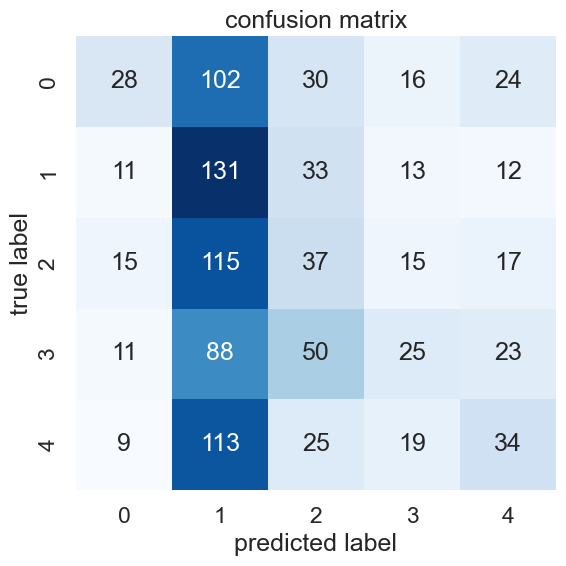

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.14      0.20       200
           1       0.24      0.66      0.35       200
           2       0.21      0.19      0.20       199
           3       0.28      0.13      0.18       197
           4       0.31      0.17      0.22       200

    accuracy                           0.26       996
   macro avg       0.28      0.26      0.23       996
weighted avg       0.28      0.26      0.23       996

Epoch 2/100
--------------------------------------------------


E:\python\eyeglasses_recommandation\venv\Lib\site-packages\torch\amp\autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


Training Loss: 1.6097, Accuracy: 0.2184
Validation Loss: 1.6221, Accuracy: 0.2490
Epoch 3/100
--------------------------------------------------
Training Loss: 1.6011, Accuracy: 0.2382
Validation Loss: 1.5960, Accuracy: 0.2249
deleted old model file: model_epoch_1.pth
best model weights saved to model_epoch_3.pth.
Epoch 4/100
--------------------------------------------------
Training Loss: 1.5961, Accuracy: 0.2419
Validation Loss: 1.5874, Accuracy: 0.2420
deleted old model file: model_epoch_3.pth
best model weights saved to model_epoch_4.pth.
Epoch 5/100
--------------------------------------------------
Training Loss: 1.5935, Accuracy: 0.2407
Validation Loss: 1.5798, Accuracy: 0.2651
deleted old model file: model_epoch_4.pth
best model weights saved to model_epoch_5.pth.
Epoch 6/100
--------------------------------------------------
Training Loss: 1.5825, Accuracy: 0.2580
Validation Loss: 1.5635, Accuracy: 0.2882
deleted old model file: model_epoch_5.pth
best model weights saved to m

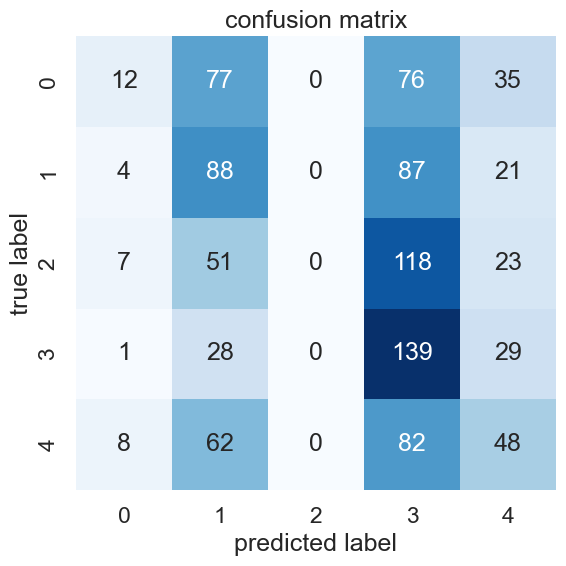

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.06      0.10       200
           1       0.29      0.44      0.35       200
           2       0.00      0.00      0.00       199
           3       0.28      0.71      0.40       197
           4       0.31      0.24      0.27       200

    accuracy                           0.29       996
   macro avg       0.25      0.29      0.22       996
weighted avg       0.25      0.29      0.22       996

Epoch 7/100
--------------------------------------------------


E:\python\eyeglasses_recommandation\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\python\eyeglasses_recommandation\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\python\eyeglasses_recommandation\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

Training Loss: 1.5733, Accuracy: 0.2646
Validation Loss: 1.5852, Accuracy: 0.2691
Epoch 8/100
--------------------------------------------------
Training Loss: 1.5662, Accuracy: 0.2712
Validation Loss: 1.5387, Accuracy: 0.3213
deleted old model file: model_epoch_6.pth
best model weights saved to model_epoch_8.pth.
Epoch 9/100
--------------------------------------------------
Training Loss: 1.5561, Accuracy: 0.2792
Validation Loss: 1.5602, Accuracy: 0.2711
Epoch 10/100
--------------------------------------------------
Training Loss: 1.5418, Accuracy: 0.2964
Validation Loss: 1.5554, Accuracy: 0.2871
Epoch 11/100
--------------------------------------------------
Training Loss: 1.5380, Accuracy: 0.3030
Validation Loss: 1.6276, Accuracy: 0.2470


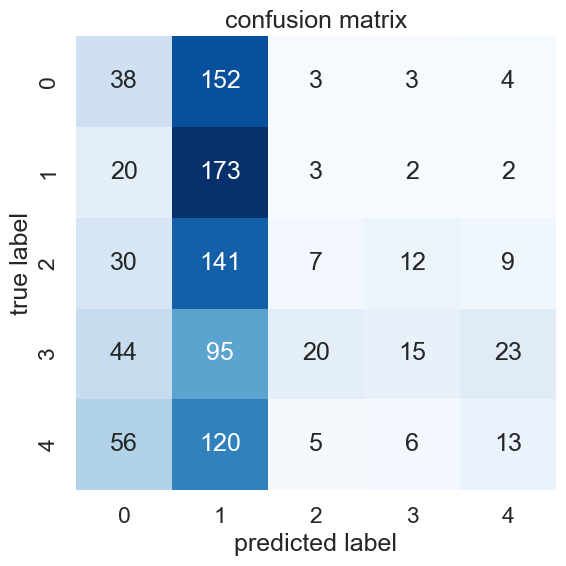

Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.19      0.20       200
           1       0.25      0.86      0.39       200
           2       0.18      0.04      0.06       199
           3       0.39      0.08      0.13       197
           4       0.25      0.07      0.10       200

    accuracy                           0.25       996
   macro avg       0.26      0.25      0.18       996
weighted avg       0.26      0.25      0.18       996

Epoch 12/100
--------------------------------------------------


E:\python\eyeglasses_recommandation\venv\Lib\site-packages\torch\amp\autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


Training Loss: 1.5288, Accuracy: 0.3030
Validation Loss: 1.5345, Accuracy: 0.2841
deleted old model file: model_epoch_8.pth
best model weights saved to model_epoch_12.pth.
Epoch 13/100
--------------------------------------------------
Training Loss: 1.5133, Accuracy: 0.3286
Validation Loss: 1.6947, Accuracy: 0.2560
Epoch 14/100
--------------------------------------------------
Training Loss: 1.5091, Accuracy: 0.3214
Validation Loss: 1.5581, Accuracy: 0.3163
Epoch 15/100
--------------------------------------------------
Training Loss: 1.4764, Accuracy: 0.3418
Validation Loss: 1.5524, Accuracy: 0.3072
Epoch 16/100
--------------------------------------------------
Training Loss: 1.4782, Accuracy: 0.3331
Validation Loss: 1.4346, Accuracy: 0.3665
deleted old model file: model_epoch_12.pth
best model weights saved to model_epoch_16.pth.


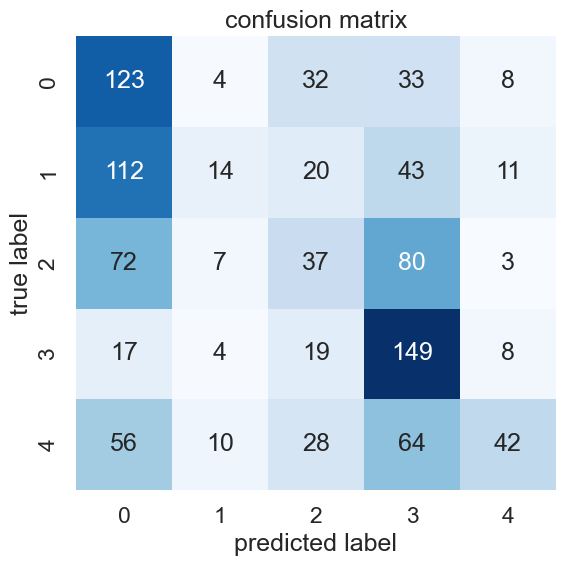

Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.61      0.42       200
           1       0.36      0.07      0.12       200
           2       0.27      0.19      0.22       199
           3       0.40      0.76      0.53       197
           4       0.58      0.21      0.31       200

    accuracy                           0.37       996
   macro avg       0.39      0.37      0.32       996
weighted avg       0.39      0.37      0.32       996

Epoch 17/100
--------------------------------------------------


E:\python\eyeglasses_recommandation\venv\Lib\site-packages\torch\amp\autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


Training Loss: 1.4521, Accuracy: 0.3679
Validation Loss: 1.7327, Accuracy: 0.2440
Epoch 18/100
--------------------------------------------------
Training Loss: 1.4329, Accuracy: 0.3664
Validation Loss: 1.4023, Accuracy: 0.3755
deleted old model file: model_epoch_16.pth
best model weights saved to model_epoch_18.pth.
Epoch 19/100
--------------------------------------------------
Training Loss: 1.4333, Accuracy: 0.3702
Validation Loss: 1.3700, Accuracy: 0.3996
deleted old model file: model_epoch_18.pth
best model weights saved to model_epoch_19.pth.
Epoch 20/100
--------------------------------------------------
Training Loss: 1.4007, Accuracy: 0.3971
Validation Loss: 1.4985, Accuracy: 0.3223
Epoch 21/100
--------------------------------------------------
Training Loss: 1.3949, Accuracy: 0.3957
Validation Loss: 1.4253, Accuracy: 0.3524


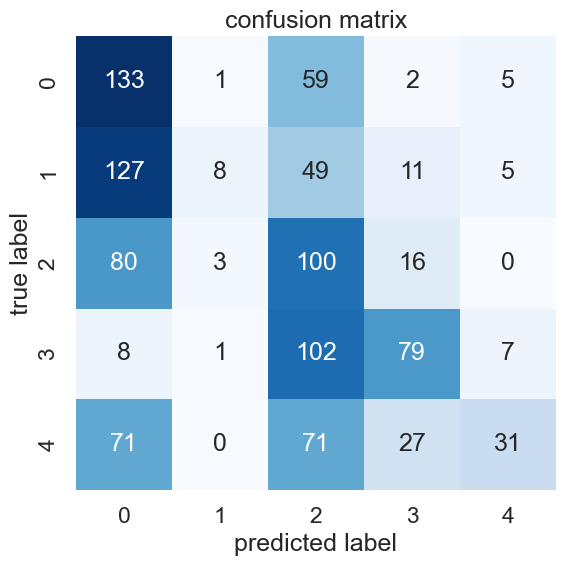

Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.67      0.43       200
           1       0.62      0.04      0.08       200
           2       0.26      0.50      0.34       199
           3       0.59      0.40      0.48       197
           4       0.65      0.15      0.25       200

    accuracy                           0.35       996
   macro avg       0.49      0.35      0.32       996
weighted avg       0.49      0.35      0.31       996

Epoch 22/100
--------------------------------------------------


E:\python\eyeglasses_recommandation\venv\Lib\site-packages\torch\amp\autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


Training Loss: 1.3686, Accuracy: 0.4192
Validation Loss: 1.3313, Accuracy: 0.4106
deleted old model file: model_epoch_19.pth
best model weights saved to model_epoch_22.pth.
Epoch 23/100
--------------------------------------------------
Training Loss: 1.3540, Accuracy: 0.4359
Validation Loss: 2.2673, Accuracy: 0.2751
Epoch 24/100
--------------------------------------------------
Training Loss: 1.3386, Accuracy: 0.4310
Validation Loss: 1.3791, Accuracy: 0.4106
Epoch 25/100
--------------------------------------------------
Training Loss: 1.3091, Accuracy: 0.4428
Validation Loss: 1.4731, Accuracy: 0.3876
Epoch 26/100
--------------------------------------------------
Training Loss: 1.2898, Accuracy: 0.4548
Validation Loss: 1.4250, Accuracy: 0.3835


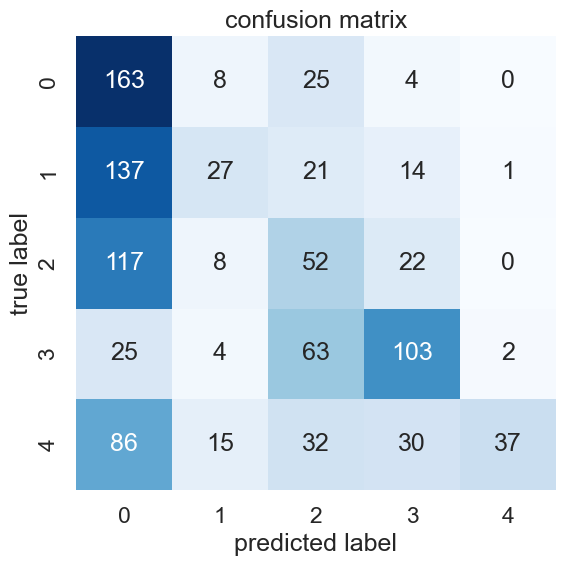

Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.81      0.45       200
           1       0.44      0.14      0.21       200
           2       0.27      0.26      0.27       199
           3       0.60      0.52      0.56       197
           4       0.93      0.18      0.31       200

    accuracy                           0.38       996
   macro avg       0.51      0.38      0.36       996
weighted avg       0.51      0.38      0.36       996

Epoch 27/100
--------------------------------------------------


E:\python\eyeglasses_recommandation\venv\Lib\site-packages\torch\amp\autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


Training Loss: 1.2516, Accuracy: 0.4752
Validation Loss: 1.1707, Accuracy: 0.5191
deleted old model file: model_epoch_22.pth
best model weights saved to model_epoch_27.pth.
Epoch 28/100
--------------------------------------------------
Training Loss: 1.2195, Accuracy: 0.4855
Validation Loss: 1.2171, Accuracy: 0.5060
Epoch 29/100
--------------------------------------------------
Training Loss: 1.1977, Accuracy: 0.5033
Validation Loss: 1.1194, Accuracy: 0.5412
deleted old model file: model_epoch_27.pth
best model weights saved to model_epoch_29.pth.
Epoch 30/100
--------------------------------------------------
Training Loss: 1.1912, Accuracy: 0.5044
Validation Loss: 1.0462, Accuracy: 0.6084
deleted old model file: model_epoch_29.pth
best model weights saved to model_epoch_30.pth.
Epoch 31/100
--------------------------------------------------
Training Loss: 1.1552, Accuracy: 0.5265
Validation Loss: 1.2630, Accuracy: 0.4618


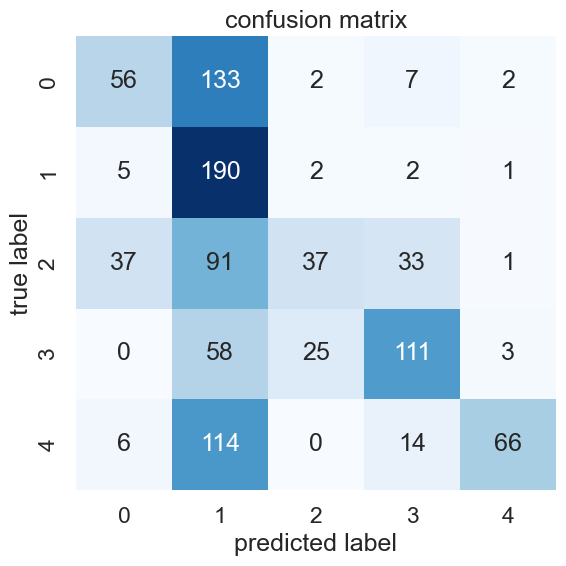

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.28      0.37       200
           1       0.32      0.95      0.48       200
           2       0.56      0.19      0.28       199
           3       0.66      0.56      0.61       197
           4       0.90      0.33      0.48       200

    accuracy                           0.46       996
   macro avg       0.60      0.46      0.44       996
weighted avg       0.60      0.46      0.44       996

Epoch 32/100
--------------------------------------------------


E:\python\eyeglasses_recommandation\venv\Lib\site-packages\torch\amp\autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


Training Loss: 1.1639, Accuracy: 0.5277
Validation Loss: 1.3502, Accuracy: 0.4538
Epoch 33/100
--------------------------------------------------
Training Loss: 1.1385, Accuracy: 0.5406
Validation Loss: 1.3746, Accuracy: 0.3855
Epoch 34/100
--------------------------------------------------
Training Loss: 1.1230, Accuracy: 0.5509
Validation Loss: 0.9727, Accuracy: 0.6456
deleted old model file: model_epoch_30.pth
best model weights saved to model_epoch_34.pth.
Epoch 35/100
--------------------------------------------------
Training Loss: 1.1175, Accuracy: 0.5412
Validation Loss: 1.3226, Accuracy: 0.4970
Epoch 36/100
--------------------------------------------------
Training Loss: 1.0869, Accuracy: 0.5679
Validation Loss: 0.9899, Accuracy: 0.6365


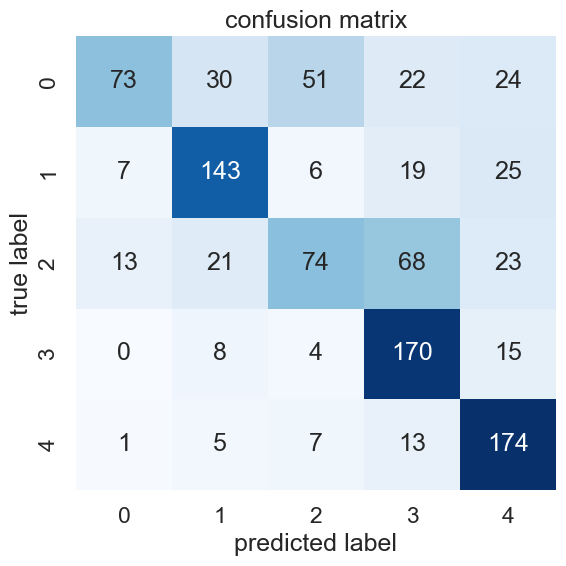

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.36      0.50       200
           1       0.69      0.71      0.70       200
           2       0.52      0.37      0.43       199
           3       0.58      0.86      0.70       197
           4       0.67      0.87      0.75       200

    accuracy                           0.64       996
   macro avg       0.65      0.64      0.62       996
weighted avg       0.65      0.64      0.62       996

Epoch 37/100
--------------------------------------------------


E:\python\eyeglasses_recommandation\venv\Lib\site-packages\torch\amp\autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


Training Loss: 1.0797, Accuracy: 0.5641
Validation Loss: 1.7103, Accuracy: 0.3966
Epoch 38/100
--------------------------------------------------
Training Loss: 1.0615, Accuracy: 0.5673
Validation Loss: 1.6394, Accuracy: 0.3916
Epoch 39/100
--------------------------------------------------
Training Loss: 1.0342, Accuracy: 0.5931
Validation Loss: 1.0771, Accuracy: 0.5723
Epoch 40/100
--------------------------------------------------
Training Loss: 1.0090, Accuracy: 0.5945
Validation Loss: 0.9535, Accuracy: 0.6365
deleted old model file: model_epoch_34.pth
best model weights saved to model_epoch_40.pth.
Epoch 41/100
--------------------------------------------------
Training Loss: 0.9886, Accuracy: 0.6080
Validation Loss: 0.9568, Accuracy: 0.6054


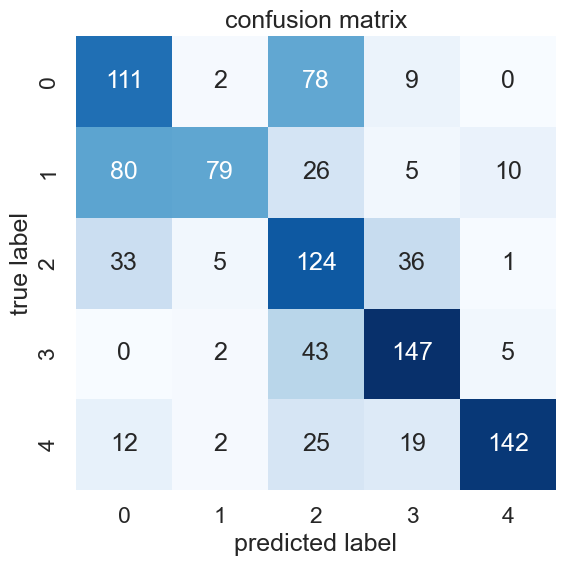

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.56      0.51       200
           1       0.88      0.40      0.54       200
           2       0.42      0.62      0.50       199
           3       0.68      0.75      0.71       197
           4       0.90      0.71      0.79       200

    accuracy                           0.61       996
   macro avg       0.67      0.61      0.61       996
weighted avg       0.67      0.61      0.61       996

Epoch 42/100
--------------------------------------------------


E:\python\eyeglasses_recommandation\venv\Lib\site-packages\torch\amp\autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


Training Loss: 0.9886, Accuracy: 0.6172
Validation Loss: 1.5668, Accuracy: 0.3956
Epoch 43/100
--------------------------------------------------
Training Loss: 0.9912, Accuracy: 0.6006
Validation Loss: 0.9583, Accuracy: 0.6215
Epoch 44/100
--------------------------------------------------
Training Loss: 0.9859, Accuracy: 0.6169
Validation Loss: 0.9061, Accuracy: 0.6436
deleted old model file: model_epoch_40.pth
best model weights saved to model_epoch_44.pth.
Epoch 45/100
--------------------------------------------------
Training Loss: 0.9592, Accuracy: 0.6238
Validation Loss: 0.9462, Accuracy: 0.6345
Epoch 46/100
--------------------------------------------------
Training Loss: 0.9533, Accuracy: 0.6296
Validation Loss: 0.8881, Accuracy: 0.6315
deleted old model file: model_epoch_44.pth
best model weights saved to model_epoch_46.pth.


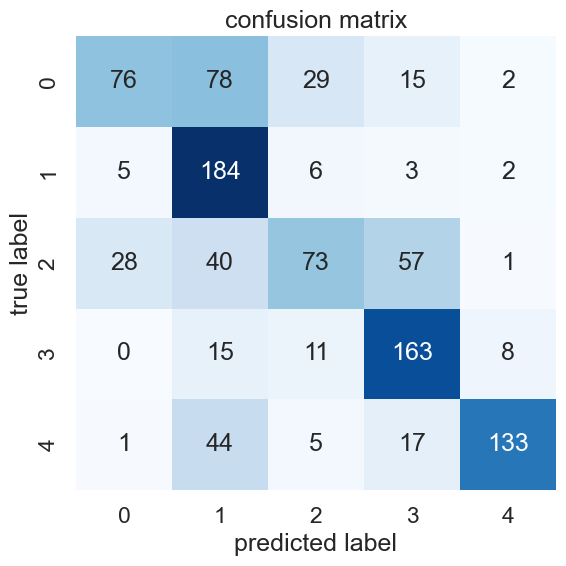

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.38      0.49       200
           1       0.51      0.92      0.66       200
           2       0.59      0.37      0.45       199
           3       0.64      0.83      0.72       197
           4       0.91      0.67      0.77       200

    accuracy                           0.63       996
   macro avg       0.67      0.63      0.62       996
weighted avg       0.67      0.63      0.62       996

Epoch 47/100
--------------------------------------------------


E:\python\eyeglasses_recommandation\venv\Lib\site-packages\torch\amp\autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


Training Loss: 0.9491, Accuracy: 0.6270
Validation Loss: 1.3474, Accuracy: 0.4669
Epoch 48/100
--------------------------------------------------
Training Loss: 0.9211, Accuracy: 0.6405
Validation Loss: 0.7995, Accuracy: 0.6928
deleted old model file: model_epoch_46.pth
best model weights saved to model_epoch_48.pth.
Epoch 49/100
--------------------------------------------------
Training Loss: 0.9547, Accuracy: 0.6264
Validation Loss: 0.8247, Accuracy: 0.6847
Epoch 50/100
--------------------------------------------------
Training Loss: 0.9334, Accuracy: 0.6287
Validation Loss: 0.8341, Accuracy: 0.6817
Epoch 51/100
--------------------------------------------------
Training Loss: 0.9264, Accuracy: 0.6336
Validation Loss: 1.2533, Accuracy: 0.5080


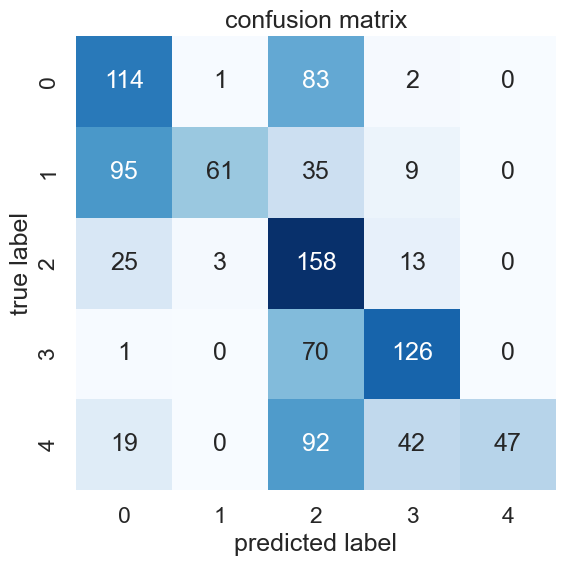

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.57      0.50       200
           1       0.94      0.30      0.46       200
           2       0.36      0.79      0.50       199
           3       0.66      0.64      0.65       197
           4       1.00      0.23      0.38       200

    accuracy                           0.51       996
   macro avg       0.68      0.51      0.50       996
weighted avg       0.68      0.51      0.50       996

Epoch 52/100
--------------------------------------------------


E:\python\eyeglasses_recommandation\venv\Lib\site-packages\torch\amp\autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


Training Loss: 0.9221, Accuracy: 0.6350
Validation Loss: 0.7519, Accuracy: 0.7299
deleted old model file: model_epoch_48.pth
best model weights saved to model_epoch_52.pth.
Epoch 53/100
--------------------------------------------------
Training Loss: 0.8987, Accuracy: 0.6534
Validation Loss: 1.0947, Accuracy: 0.5773
Epoch 54/100
--------------------------------------------------
Training Loss: 0.8895, Accuracy: 0.6582
Validation Loss: 1.1651, Accuracy: 0.5452
Epoch 55/100
--------------------------------------------------
Training Loss: 0.9022, Accuracy: 0.6442
Validation Loss: 1.0909, Accuracy: 0.5502
Epoch 56/100
--------------------------------------------------
Training Loss: 0.8849, Accuracy: 0.6525
Validation Loss: 1.0066, Accuracy: 0.6295


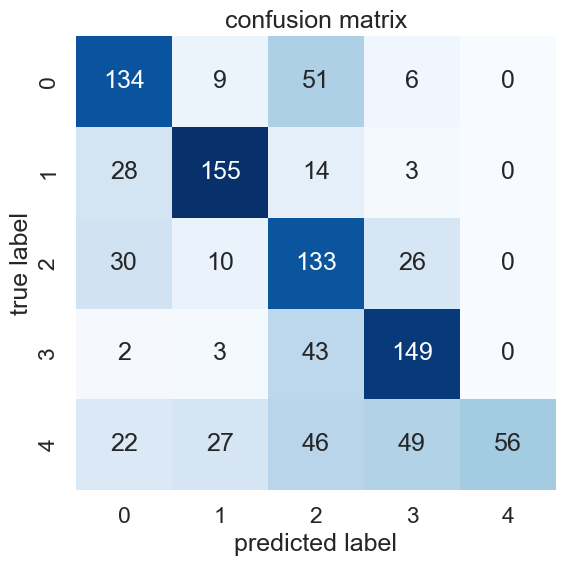

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.67      0.64       200
           1       0.76      0.78      0.77       200
           2       0.46      0.67      0.55       199
           3       0.64      0.76      0.69       197
           4       1.00      0.28      0.44       200

    accuracy                           0.63       996
   macro avg       0.70      0.63      0.62       996
weighted avg       0.70      0.63      0.62       996

Epoch 57/100
--------------------------------------------------


E:\python\eyeglasses_recommandation\venv\Lib\site-packages\torch\amp\autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


Training Loss: 0.8811, Accuracy: 0.6585
Validation Loss: 0.7236, Accuracy: 0.7249
deleted old model file: model_epoch_52.pth
best model weights saved to model_epoch_57.pth.
Epoch 58/100
--------------------------------------------------
Training Loss: 0.8485, Accuracy: 0.6740
Validation Loss: 0.8991, Accuracy: 0.6476
Epoch 59/100
--------------------------------------------------
Training Loss: 0.8431, Accuracy: 0.6749
Validation Loss: 0.9653, Accuracy: 0.6536
Epoch 60/100
--------------------------------------------------
Training Loss: 0.8468, Accuracy: 0.6686
Validation Loss: 0.7246, Accuracy: 0.7299
Epoch 61/100
--------------------------------------------------
Training Loss: 0.8518, Accuracy: 0.6634
Validation Loss: 0.7803, Accuracy: 0.6928


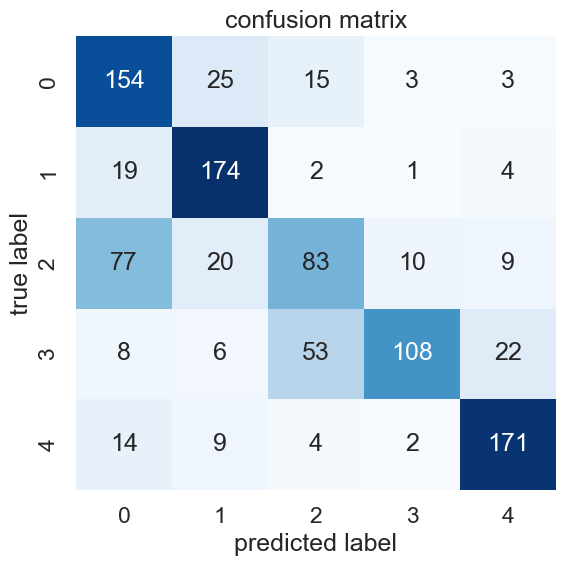

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.77      0.65       200
           1       0.74      0.87      0.80       200
           2       0.53      0.42      0.47       199
           3       0.87      0.55      0.67       197
           4       0.82      0.85      0.84       200

    accuracy                           0.69       996
   macro avg       0.71      0.69      0.69       996
weighted avg       0.71      0.69      0.69       996

Epoch 62/100
--------------------------------------------------


E:\python\eyeglasses_recommandation\venv\Lib\site-packages\torch\amp\autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


Training Loss: 0.8293, Accuracy: 0.6864
Validation Loss: 0.7223, Accuracy: 0.7329
deleted old model file: model_epoch_57.pth
best model weights saved to model_epoch_62.pth.
Epoch 63/100
--------------------------------------------------
Training Loss: 0.8053, Accuracy: 0.6887
Validation Loss: 0.7398, Accuracy: 0.7149
Epoch 64/100
--------------------------------------------------
Training Loss: 0.8320, Accuracy: 0.6809
Validation Loss: 0.7799, Accuracy: 0.6968
Epoch 65/100
--------------------------------------------------
Training Loss: 0.8154, Accuracy: 0.6809
Validation Loss: 0.7136, Accuracy: 0.7380
deleted old model file: model_epoch_62.pth
best model weights saved to model_epoch_65.pth.
Epoch 66/100
--------------------------------------------------
Training Loss: 0.8212, Accuracy: 0.6861
Validation Loss: 0.7558, Accuracy: 0.7189


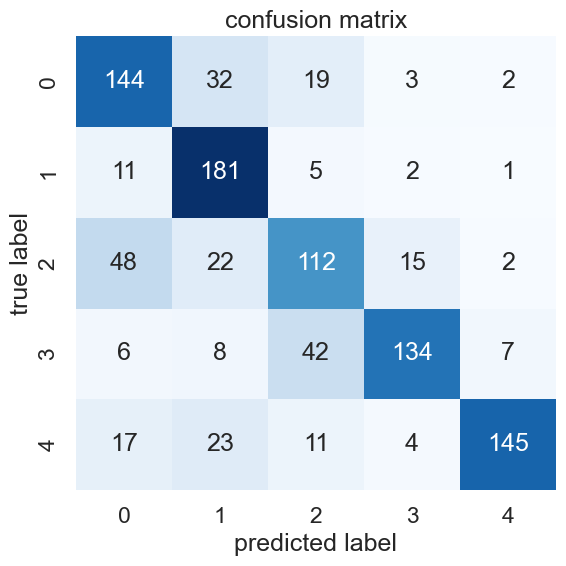

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.72      0.68       200
           1       0.68      0.91      0.78       200
           2       0.59      0.56      0.58       199
           3       0.85      0.68      0.75       197
           4       0.92      0.72      0.81       200

    accuracy                           0.72       996
   macro avg       0.74      0.72      0.72       996
weighted avg       0.74      0.72      0.72       996

Epoch 67/100
--------------------------------------------------


E:\python\eyeglasses_recommandation\venv\Lib\site-packages\torch\amp\autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


Training Loss: 0.8009, Accuracy: 0.6904
Validation Loss: 0.6760, Accuracy: 0.7560
deleted old model file: model_epoch_65.pth
best model weights saved to model_epoch_67.pth.
Epoch 68/100
--------------------------------------------------
Training Loss: 0.8018, Accuracy: 0.6892
Validation Loss: 0.7271, Accuracy: 0.7369
Epoch 69/100
--------------------------------------------------
Training Loss: 0.8161, Accuracy: 0.6844
Validation Loss: 0.7129, Accuracy: 0.7380
Epoch 70/100
--------------------------------------------------
Training Loss: 0.7966, Accuracy: 0.6933
Validation Loss: 0.6916, Accuracy: 0.7390
Epoch 71/100
--------------------------------------------------
Training Loss: 0.8099, Accuracy: 0.6970
Validation Loss: 0.7433, Accuracy: 0.7309


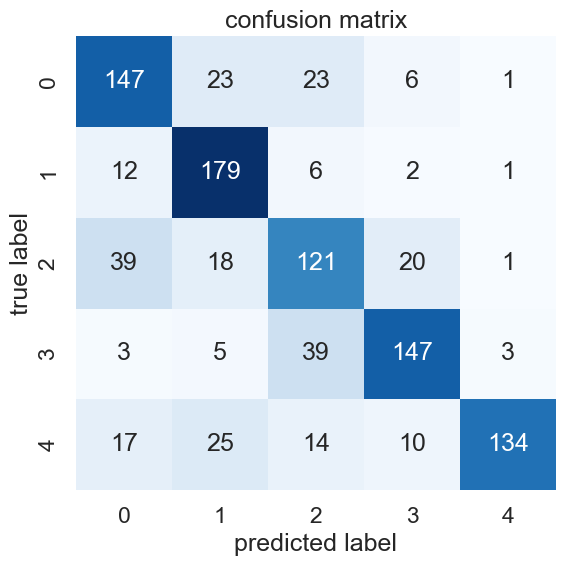

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.73      0.70       200
           1       0.72      0.90      0.80       200
           2       0.60      0.61      0.60       199
           3       0.79      0.75      0.77       197
           4       0.96      0.67      0.79       200

    accuracy                           0.73       996
   macro avg       0.75      0.73      0.73       996
weighted avg       0.75      0.73      0.73       996

Epoch 72/100
--------------------------------------------------


E:\python\eyeglasses_recommandation\venv\Lib\site-packages\torch\amp\autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


Training Loss: 0.8175, Accuracy: 0.6818
Validation Loss: 0.7089, Accuracy: 0.7299
Epoch 73/100
--------------------------------------------------
Training Loss: 0.7920, Accuracy: 0.6970
Validation Loss: 0.6877, Accuracy: 0.7520
Epoch 74/100
--------------------------------------------------
Training Loss: 0.7771, Accuracy: 0.7076
Validation Loss: 0.6959, Accuracy: 0.7430
Epoch 75/100
--------------------------------------------------
Training Loss: 0.8058, Accuracy: 0.6935
Validation Loss: 0.6981, Accuracy: 0.7390
Epoch 76/100
--------------------------------------------------
Training Loss: 0.7997, Accuracy: 0.6964
Validation Loss: 0.6989, Accuracy: 0.7490


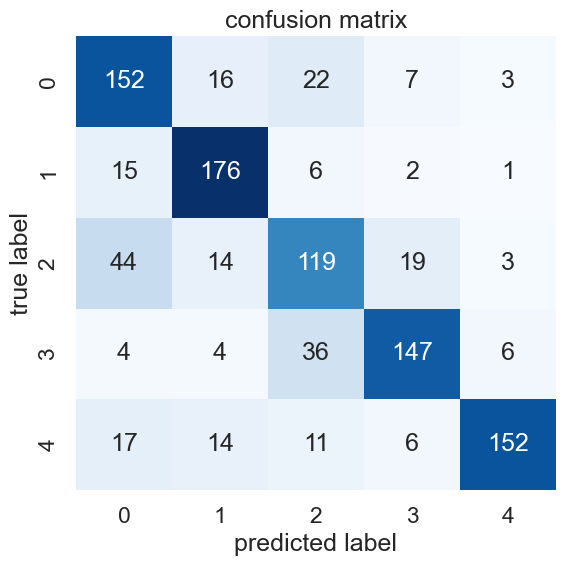

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.76      0.70       200
           1       0.79      0.88      0.83       200
           2       0.61      0.60      0.61       199
           3       0.81      0.75      0.78       197
           4       0.92      0.76      0.83       200

    accuracy                           0.75       996
   macro avg       0.76      0.75      0.75       996
weighted avg       0.76      0.75      0.75       996

Epoch 77/100
--------------------------------------------------


E:\python\eyeglasses_recommandation\venv\Lib\site-packages\torch\amp\autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


Training Loss: 0.8075, Accuracy: 0.6849
Validation Loss: 0.6990, Accuracy: 0.7369
Epoch 78/100
--------------------------------------------------
Training Loss: 0.7854, Accuracy: 0.6918
Validation Loss: 0.6863, Accuracy: 0.7500
Epoch 79/100
--------------------------------------------------
Training Loss: 0.7915, Accuracy: 0.7010
Validation Loss: 0.6802, Accuracy: 0.7530
Epoch 80/100
--------------------------------------------------
Training Loss: 0.7969, Accuracy: 0.6907
Validation Loss: 0.6909, Accuracy: 0.7400
Epoch 81/100
--------------------------------------------------
Training Loss: 0.7888, Accuracy: 0.6976
Validation Loss: 0.6824, Accuracy: 0.7520


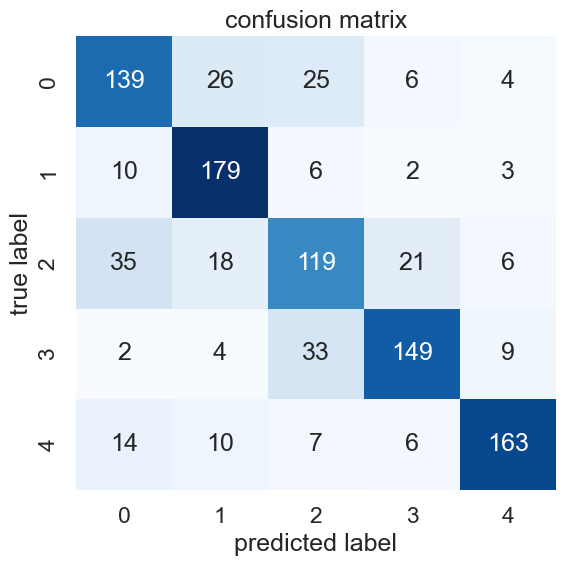

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       200
           1       0.76      0.90      0.82       200
           2       0.63      0.60      0.61       199
           3       0.81      0.76      0.78       197
           4       0.88      0.81      0.85       200

    accuracy                           0.75       996
   macro avg       0.75      0.75      0.75       996
weighted avg       0.75      0.75      0.75       996

Epoch 82/100
--------------------------------------------------


E:\python\eyeglasses_recommandation\venv\Lib\site-packages\torch\amp\autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


Training Loss: 0.7975, Accuracy: 0.6835
Validation Loss: 0.6834, Accuracy: 0.7490
early stopping triggered after  15 epochs of no improvment.
🚨 Early stopping triggered at epoch 82.
Loading best model weights...


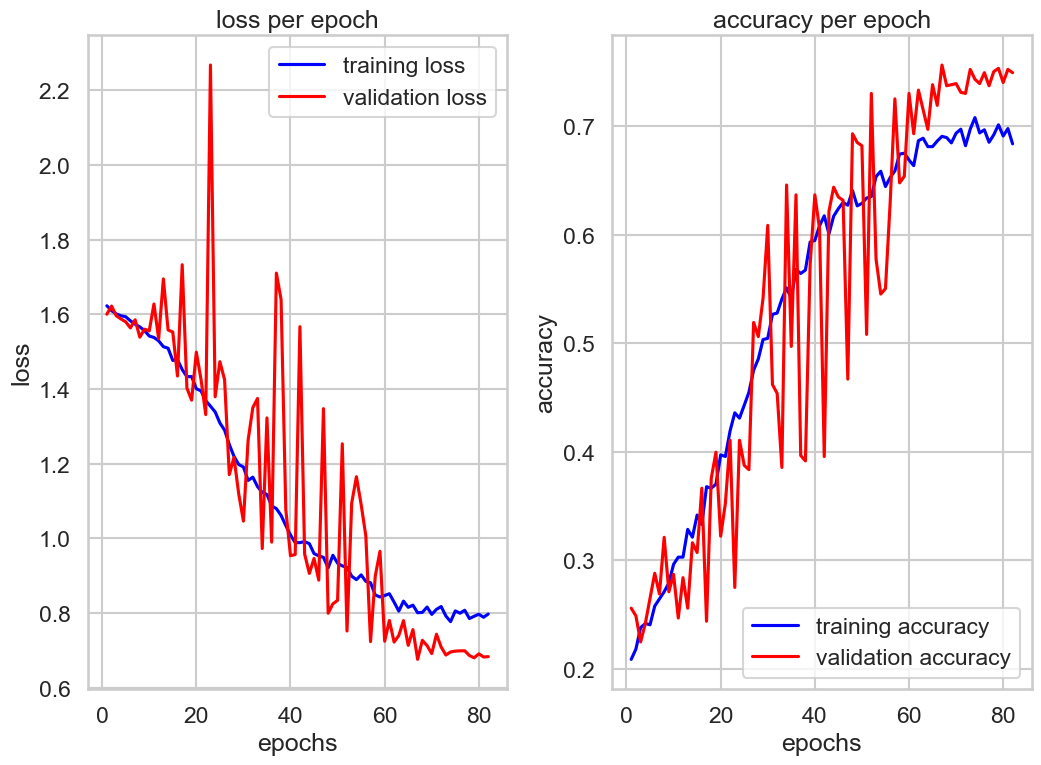

In [28]:
# Example:
early_stopping = EarlyStopping(patience=15, verbose=True, delta=0)
model_name_prefix = "CustomCNN1"  # Or dynamically change this per model
trained_model = train_and_validate(
    model,
    train_loader,
    val_loader,
    optimizer,
    scheduler,
    loss_fn,
    epochs=100,
    device=device,
    early_stopping=early_stopping,
    model_name_prefix=model_name_prefix)

Test Loss: 0.7453, Test Accuracy: 0.7309
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.63      0.66       100
           1       0.79      0.87      0.83       100
           2       0.57      0.54      0.55        99
           3       0.74      0.78      0.76        99
           4       0.83      0.84      0.84       100

    accuracy                           0.73       498
   macro avg       0.73      0.73      0.73       498
weighted avg       0.73      0.73      0.73       498


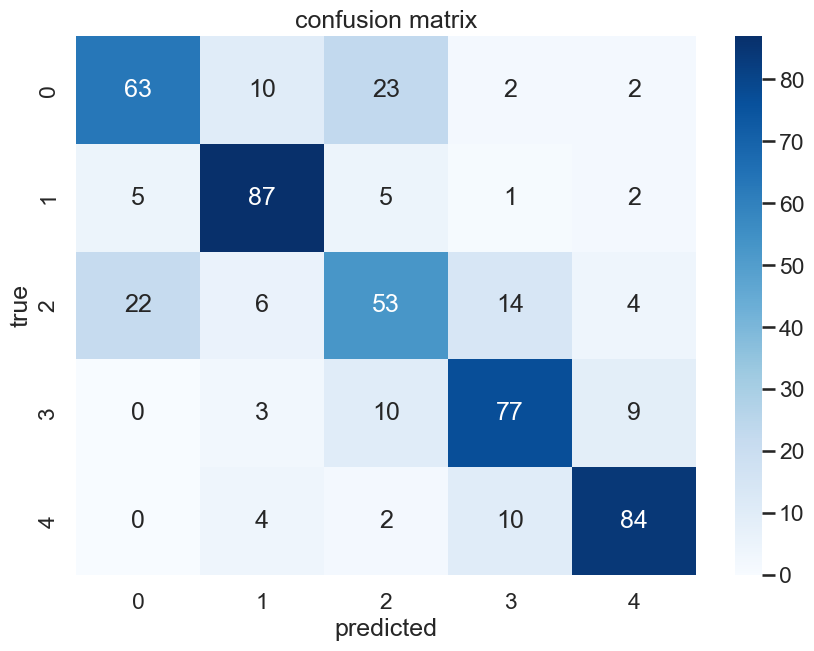

In [29]:
test_model(trained_model, test_loader, loss_fn, device, num_classes=5)